# Navi_Goal_rob

#### Description:

 this node allows for user three type of choise 

In the user interface with three choices:

A) GO TO POINT: 
Where the user enters the coordinates of the point where the robot must go.

B) CONTROLLER: 
Where the user moves the robot with a controller,
but the robot can crash with obstacles.

C) ASSISTENT CONTROLLER: 
where the user moves the robot with a controller, 
but the robot does not crash into obstacles, 
because it is equipped with laserscan which makes it stop near obstacles.

 and after reading the choise of user  
 send it to other node

##### that is the library that we are used to implement the program

In [2]:
#!/usr/bin/env python3

import rospy
from move_base_msgs.msg import MoveBaseAction
from move_base_msgs.msg import MoveBaseGoal
from geometry_msgs.msg import Point32
from nav_msgs.msg import Odometry
import actionlib
import matplotlib.pyplot as plt 
import time
from time import sleep 
import ipywidgets as widgets
from ipywidgets import Button, Layout, ButtonStyle, GridBox, VBox, HBox 
from IPython.display import display
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual 
import jupyros as jr
from jupyros import ros3d 
import os
from sensor_msgs.msg import LaserScan


### goPoint()

 #### Description:

 This function let the user insert the coordinate of the point 
 and if this cordinate are out of the perimeter request them again
 otherwise stop controller and send the to server the coordinate
 then ask the user if wont to calcel the goal and
 if yes cancel the goal
 if no starting with timeout 

##### function that we used to implement the function go to point
    setX():
        function used for set the coordinate X of Goal
    setY():
        function  used for set the coordinate Y of Goal
    pos_rob():
        function  used for find the coordinate of the of the robot
    V_Cancel():
        function used for check the choice of the user for canceling Goal
    SendGoal():
        function  used for send the coordinate of Goal to the server MoveBase
    Timeout():
        function used for set the timeout and to cancel the Goal if user want it
    stopping():
        function used for stop the function go_Point with closing the widgets

In [8]:
global G_Ret
global GNot_Ret
global t
t=False
G_Ret=0
GNot_Ret=0

def setX(b):
    global Cordx
    Cordx=b['new']
    
def setY(b):
    global Cordy
    Cordy=b['new']
    
def pos_rob(m):
    global x_rob
    global y_rob
    x_rob = m.pose.pose.position.x
    y_rob = m.pose.pose.position.y
        
def V_Cancel(b):
    
    t=b['new']
    
    
    
def goPoint(n):

   #tell the action client that we want to spin a thread by default

    ac = actionlib.SimpleActionClient('move_base',MoveBaseAction)

    rospy.loginfo("Waiting for action server to start.")
  # wait for the action server to start

    def SendGoal(b): 
  
            goal = MoveBaseGoal()


              #we'll send a goal to the robot to move 1 meter forward
            goal = MoveBaseGoal()
            goal.target_pose.header.frame_id = "map"
            goal.target_pose.header.stamp = rospy.Time.now()
            goal.target_pose.pose.position.x = Cordx
            goal.target_pose.pose.position.y = Cordy
            goal.target_pose.pose.orientation.w = 1.0

              #will wait for infinite time

            print("cordinate Goal : ",goal.target_pose.pose.position.y,goal.target_pose.pose.position.x)
            
            ac.send_goal(goal)
     
    def Timeout(b):

           
        BCancelG=widgets.Checkbox(value=False,description='Cancel Goal',disabled=False,indent=False)
        display(BCancelG)
        rospy.loginfo("Waiting the goal for 25 second")
        sleep(5)
        
        BCancelG.observe(V_Cancel,names='value')
        if t:
            ac.cancel_all_goals()
            rospy.loginfo("Goal Canceled !!!")
            
        else:
        
            sleep(20)
            if (Cordx-0.4 < x_rob < Cordx+0.4) and (Cordy-0.4 < y_rob < Cordy+0.4):

                rospy.loginfo("Goal Rechead !!!")
                G_Ret=G_Ret+1
            else:
                ac.cancel_all_goals()
                rospy.loginfo("Goal not Reached !!!")
                GNot_Ret=GNot_Ret+1
        BCancelG.close()
        
    def stopping(b):
        BSendG.close()
        X.close()
        Y.close()
        Bstop.close()
        
    X=widgets.FloatText(description='X_cord:',disabled=False)
    Y=widgets.FloatText(description='Y_cord:',disabled=False)

    BSendG = widgets.Button(description='Send_Goal',disabled=False,button_style='',tooltip='Click me',icon='check')
    Bstop = widgets.Button(description='STOP',disabled=False,button_style='danger',tooltip='Click me',icon='check')
    my_vel= Point32()
    my_vel.x =0.0
    my_vel.y =0.0 
    my_vel.z=n			# to stop the controller
    pub.publish(my_vel)
    X.observe(setX, names='value')
    Y.observe(setY, names='value') 
    BSendG.on_click(SendGoal)
    BSendG.on_click(Timeout)
    Bstop.on_click(stopping)
    display(HBox([VBox([X, Bstop]),VBox([Y,BSendG])]))


### controller()

 #### Description:
 
 This function read input of the user, 
 and set the linear and angular velocity on /vel_cont
 and set the assistant control to on/off

##### function that we used to implement the function  controller
    VLin():
        function used for set the linear velocity of robot
    VAng():
        function  used for set the Angular velocity of robot
    resetV():
        function  used for reset to 0 the velocity of the robot
    stopping():
        function used for stop the function controller with closing the widgets

In [3]:


def controller(n):

	
	b=0;c=0;z=n
	
	def VLin(x):
	    my_vel= Point32()
	    my_vel.x =x['new']
	    my_vel.y =c 
	    my_vel.z=z
	    pub.publish(my_vel)
	def VAng(x):
	    my_vel= Point32()
	    my_vel.x =b
	    my_vel.y =x['new']
	    my_vel.z=z
	    pub.publish(my_vel)
	def resetV(b):
	    if b:
	        my_vel= Point32()
	        my_vel.x =0
	        my_vel.y =0
	        my_vel.z=z
	        pub.publish(my_vel)
	if 1: 

		vl=widgets.FloatSlider(value=0,min=-5.0,max=5.0,step=0.2,description='v.linear :',disabled=False,continuous_update=True,orientation='vertical',readout=True,readout_format='.1f',)
		va=widgets.FloatSlider(value=0,min=-10,max=10.0,step=0.1,description='V.angular :',disabled=False,continuous_update=True,readout=True,readout_format='.1f',)
		butt=widgets.Button(description='STOP',disabled=False,button_style='danger', tooltip='Click me',icon='check')
		resbutt = widgets.Button(description='Reset',disabled=False,button_style='warning',tooltip='Click me',icon='check' )
		def stoping(b):
				if b:
					va.close()
					vl.close()
					butt.close()
					resbutt.close()
                
		display(GridBox(children=[vl,va], layout=Layout(
        width='50%',
        grid_template_rows='auto centered', grid_template_columns='50%  50%,50%  50%', grid_template_areas='''
        " vl  ." 
        ".  va"
        ''')
        ))
		display(HBox([butt,resbutt]))
		va.observe(VAng,names='value')
		vl.observe(VLin, names='value')

		butt.on_click(stoping)
		resbutt.on_click(resetV)
        




### main()

####  Description:

 the main function initialize the node, the nodehandler
 and the publisher, after that start with a andless loop
 wich calls the functions depending of the user choise
 break the loop and stopping the node.  

##### function that we used to implement the function  main
    On_p():
        function used for call_back function goPoint()
    contr():
        function  used for call_back function controller() Assistant_Controller = OFF
    Acontr():
        function  used for call_back function controller() Assistant_Controller = ON
    stopping():
        function used for stop the program with the function exit() exiting from program

In [4]:


def on_p(b):
    if b:
        goPoint(-1.0)
def contr(b):
    if b:
        controller(1.0)
def Acontr(b):
    if b:
        controller(2.0)


def main():
	global pub
	global sub
	rospy.init_node('navi_goal_rob')
	pub = rospy.Publisher('/vel_cont', Point32, queue_size=1)#defined the pulisher
	sub = rospy.Subscriber('/odom', Odometry , pos_rob)

	button = widgets.Button(description='STOP',disabled=False,button_style='danger',tooltip='Click me',icon='check')
	
	if 1:


		Bgp = widgets.Button(description="go_Point",button_style='info',tooltip='Click me')
		Bc = widgets.Button(description="Controller",button_style='info',tooltip='Click me')
		Bac = widgets.Button(description="AssController",button_style='info',tooltip='Click me')
		def stoping(b):
			if b:
				exit()
		button.on_click(stoping)

		Bgp.on_click(on_p)
		Bc.on_click(contr)
		Bac.on_click(Acontr)
        

		display(HBox([Bgp,VBox([Bc, button]),Bac]))


##### that is the call_back of the main function 

In [5]:
if __name__ == '__main__':
    main()


[INFO] [1654088911.180997, 202.326000]: Waiting for action server to start.


cordinate Goal :  0.1 0.1


Checkbox(value=False, description='Cancel Goal', indent=False)

[INFO] [1654088958.684438, 241.173000]: Waiting the goal for 25 second
[INFO] [1654088983.716831, 261.368000]: Goal not Reached !!!


UnboundLocalError: local variable 'GNot_Ret' referenced before assignment

GridBox(children=(FloatSlider(value=0.0, description='v.linear :', max=5.0, min=-5.0, orientation='vertical', …

##### that label show the 3D view of the simulation 

In [6]:
# 3D view of the fobot and of the enviroment 

v = ros3d.Viewer()
rc = ros3d.ROSConnection(url="ws://localhost:9090") 
tf_client = ros3d.TFClient(ros=rc, fixed_frame='map')
laser_view = ros3d.LaserScan(topic="/scan", ros=rc, tf_client=tf_client) 
map_view = ros3d.OccupancyGrid(topic="/map", ros=rc, tf_client=tf_client) 
path = ros3d.Path(topic="/move_base/NavfnROS/plan", ros=rc, tf_client=tf_client)
urdf = ros3d.URDFModel(ros=rc, tf_client=tf_client, path=os.environ.get('JUPYROS_ASSETS_URL', 'http://localhost:3000')) 
g = ros3d.GridModel()
v.objects = [g, laser_view, map_view, path, urdf]
v


Viewer(objects=[GridModel(), LaserScan(ros=ROSConnection(url='ws://localhost:9090'), tf_client=TFClient(fixed_…

#### that labe show thw graf abot reach and not reach goal

Button(description='Click Me!', style=ButtonStyle())

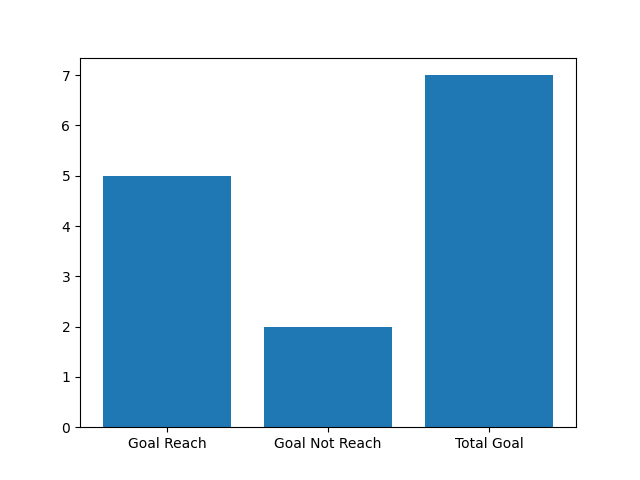

In [5]:
%matplotlib widget
bu = widgets.Button(description="Click Me!") 
display(bu)

def on_button_clicked(b):
    n=[G_Ret,GNot_Ret,(G_Ret + GNot_Ret)]
    q=["Goal Reach","Goal Not Reach","Total Goal"]
    fig = plt.bar(q,n)
bu.on_click(on_button_clicked)

Button(description='Click Me!', style=ButtonStyle())

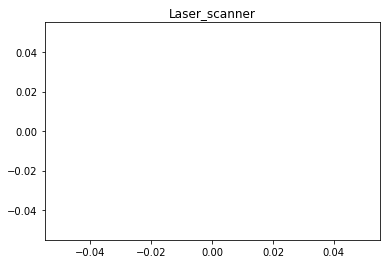

In [4]:
global rang
rang=[]
def plotlaser(b):
    def laser(b):
        rang=b.ranges[0:720]
        plt.plot(rang)
        plt.title("Laser_scanner")
    sub = rospy.Subscriber('/scan', LaserScan , laser)
    plt.plot(rang)
    plt.title("Laser_scanner")
bu = widgets.Button(description="Click Me!") 
display(bu)
bu.on_click(plotlaser)